In [189]:
from pylab import *
%matplotlib inline

In [190]:
from time import sleep # To set the animation frame rate 
from IPython.display import clear_output # To redraw

def animate_tx(tArray, xArray, yArray, numFrames=20):
    '''Creates and displays an animation of z(x,t)
    Input:
        tArray: 1D array of time values
        xArray: 1D array of position values
        yArray: 2D array of y[time][position]
        (optional): # of frames to display, evenly
                    spaced from tArray[0] to tArray[-1]
    '''
    # Min & Max values for vertical axis of plot
    yMin = np.min(yArray)
    yMax = np.max(yArray)
    
    tNum = size(tArray) # Number of TOTAL time values...
    for i in range(0, tNum, tNum // (numFrames-1)):
        sleep(0.05) # Sets the maximum animation speed
        plot(xArray, yArray[i])
        ylim([yMin, yMax])
        xlabel('Position (nm)')
        ylabel('$\\rho(x)$ (1/nm)')
        titleString = "Time (fs): " + str(round(tArray[i],1))
        title(titleString)
        clear_output(wait=True)
        grid(True); show()

# 4

In [191]:
Nx = 1000
x0 = 50.0
x = linspace(-x0,x0,Nx)
hbar = 1
m = 1
p0 = 1
#dp = linspace(0,p0,1000)
dp = 0.1
t = 1

In [192]:
psi0 = 0.5*exp(1j*(p0+dp)*x/hbar)+exp(1j*p0*x/hbar)+(1/2)*exp(1j*((p0-dp)**2)*t/(2*m*hbar))

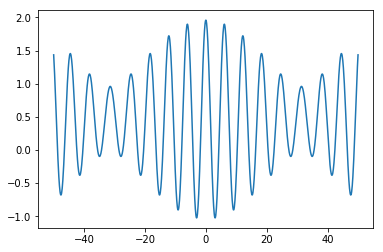

In [193]:
plot(x,real(psi0))

In [194]:
psi0 = 0.5*exp(1j*(p0+dp)*x/hbar)*exp(-1j*t*(p0-dp)**2/(2*m*hbar))+exp(1j*p0*x/hbar)*exp(-1j*t*(p0)**2/(2*m*hbar))+(1/2)*exp(1j*((p0-dp)**2)*t/(2*m*hbar))*exp(-1j*t*(p0-dp)**2/(2*m*hbar))

In [195]:
Nt = 1000
tmax = 1000.0
t = linspace(0,tmax,Nt)
psit = zeros((Nt,Nx))

for i in range(0,Nt):
    psi = 0.5*exp(1j*(p0-dp)*x/hbar)*exp(-1j*t[i]*((p0-dp)**2)/(2.0*m*hbar))
    psi = psi+exp(1j*(p0)*x/hbar)*exp(-1j*t[i]*((p0)**2)/(2.0*m*hbar))
    psi = psi + 0.5*exp(1j*(p0+dp)*x/hbar)*exp(-1j*t[i]*((p0+dp)**2)/(2.0*m*hbar))
    
    psit[i,:] = real(psi)

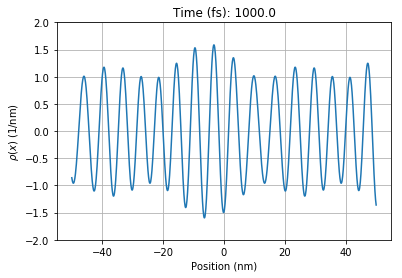

In [198]:
animate_tx(t,x,psit,numFrames = 1000)

# 2

In [ ]:
a = sym.Symbol('a')
hbar = sym.Symbol('hbar')
t = sym.Symbol('t')
m = sym.Symbol('m')
x = sym.Symbol('x')
i = sym.Symbol('i')

In [ ]:
outfront = ((a/sym.pi)**(1/4))/((1+i*hbar*a*t/m)**(1/2))
outfront

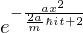

In [58]:
func = exp( (-a*(x**(2))) / (2*(1+i*hbar*a*t/m)) )
func

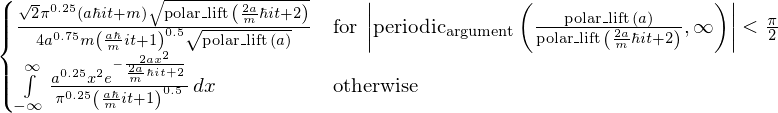

In [61]:
sym.integrate(outfront*(x**2)*(func**2),(x,-sym.oo,sym.oo))